### Introduction 
- **PROBLEM DEFINITION**  
Within the realm of factory manufacturing, diverse resources including labor, infrastructure, and electrical utilities are expended. Ensuring the optimal utilization of these resources is mandatory.  
**KEPCO (Korea Electric Power Corporation)** _(which is the provider of the dataset of the research)_ calculates electricity prices based on the maximum power demand. **The maximum power demand, also known as the peak demand,** refers to the power accumulated in a predetermined time unit through transformers installed in a factory. Maximum power demand is calculated to be prepared for scenarios like facility failures and the sudden use of high-capacity equipment. This calculation involves finding the average power over a predetermined specific time period. In the case of KEPCO, this time period is 15 minutes.  
KEPCO monitors the three-month maximum power demand pattern and charges electricity fees by applying the base rate for the next year based on the highest maximum demand power. Therefore, it is important to efficiently manage the maximum demand power from the perspective of the company. If the maximum demand power increases, it leads to an increase in operating costs and acts as a factor in increasing the cost of the company.
- **DATA DESCRIPTION**  
The dataset, provided by KEPCO, is collected from the transformer detection sensors of a factory during the manufacturing process at **15-minute intervals.**
First, we should state that **15mins**, **30mins**, **45mins**, **60mins**, and **average** columns are the dependent variables and all the other columns are independent variables. The values in the dependent columns exhibit correlations with the values in the independent columns.  
Now, let us look at the meaning of each column.  
- **date** : Operation date, it starts with 1st of January, 2021 and goes until 14th of September, 2021  
- **hour** : Operation hour 
- **15mins** : Maximum power usage for the first 15 minutes of the hour  
- **30mins** : Maximum power usage for the 15-30 minutes of the hour  
- **45mins** : Maximum power usage for the 30-45 minutes of the hour  
- **60mins** : Maximum power usage for the 45-60 minutes of the hour  
- **average** : Average of the 15mins, 30mins, 45mins, and 60mins values  
- **production** : Production value to be produced at the corresponding time  
- **temperature** : Temperature at the corresponding time  
- **wind_speed** : Wind speed at the corresponding time  
- **humidity** : Humidity at the corresponding time  
- **rainfall** : Amount of rainfall at the corresponding time  
- **electricity_bill_by_season** : Electricity bill for the season, it has 3 different values because the dates in the data contain only winter, spring, and summer seasons. This is because the dates in the data are until 14th of September.     
- **day_of_the_week** : It has values from 1 to 7 and these numbers represent the day of the week  
- **day** : It represents which day of the month it is  
- **month** : It represents which month of the year it is  
- **num_of_workers** : It represents the manpower that was used that day   
- **personnel_expenses** : Ratio of night and day labor costs  


## Section1: EDA

In [2]:
import pandas as pd

df = pd.read_csv('./data/전기생산량.csv',parse_dates=True, index_col=0).reset_index()
df.head()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,2021-01-01,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,2021-01-01,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,2021-01-01,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
3,2021-01-01,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
4,2021-01-01,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5


In [3]:
new_column_names = [
    'date',
    'hour',
    '15mins',
    '30mins',
    '45mins',
    '60mins',
    'average',
    'production',
    'temperature',
    'wind_speed',
    'humidity',
    'rainfall',
    'electricity_bill_by_season',
    'day_of_the_week',
    'day',
    'month',
    'num_of_workers',
    'personnel_expenses'
]

df.columns = new_column_names
print('The number of columns in the dataset is:' , len(df.columns))
print('The number of rows in the dataset is:' , len(df))

The number of columns in the dataset is: 18
The number of rows in the dataset is: 6168


In [4]:
df['y'] = df['date'].dt.year
df['m'] = df['date'].dt.month 
df['d'] = df['date'].dt.day
df['day'] = df['date'].dt.dayofweek

In [5]:
df_group_day = df.groupby('date').mean().reset_index()

In [6]:
df_group_day.isnull().any()

date                          False
hour                          False
15mins                        False
30mins                        False
45mins                        False
60mins                        False
average                       False
production                    False
temperature                   False
wind_speed                    False
humidity                      False
rainfall                      False
electricity_bill_by_season    False
day_of_the_week               False
day                           False
month                         False
num_of_workers                False
personnel_expenses            False
y                             False
m                             False
d                             False
dtype: bool

### Visualization - Production
First we visualized the daily 'average' value which is the average peak demand of electrity for everyday and the 'production' value. Both average and production exhibit a bimodal distribution, suggesting that the factor behind this might be related to date-specific characteristics, such as weekends and weekdays. 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='average'>

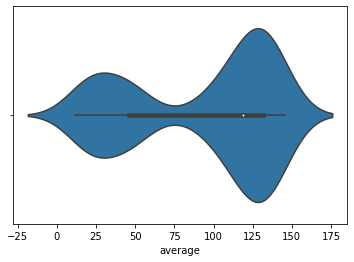

In [8]:
sns.violinplot(data=df_group_day, x='average')

<AxesSubplot:xlabel='production'>

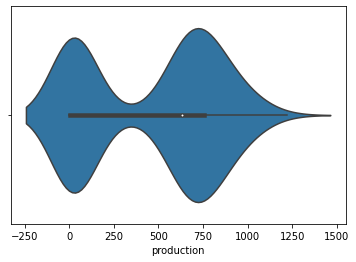

In [9]:
sns.violinplot(data=df_group_day, x='production')

### Visualization - Weekends/Weekdays
When visualized by categorizing into weekends and weekdays, it was observed that peak power consumption (average) and production quantity are lower on weekends and relatively higher on weekdays.

In [10]:
df_group_day['part_of_the_week']=df_group_day.day.map(lambda x: 'Weekday' if x<5 else 'Weekend')

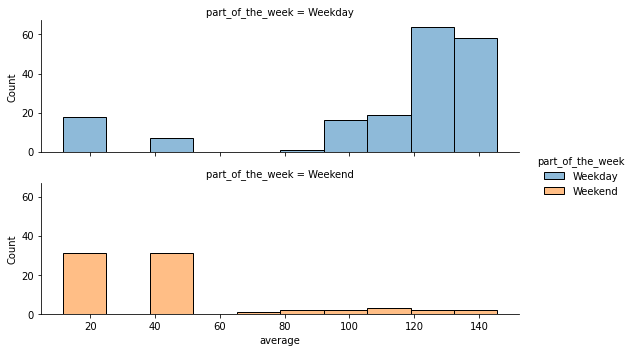

In [11]:
sns.displot(data=df_group_day, x='average', row='part_of_the_week',hue='part_of_the_week', height=2.5, aspect=3)

In [12]:
df_group_day

,date,hour,15mins,30mins,45mins,60mins,average,production,temperature,wind_speed,...,electricity_bill_by_season,day_of_the_week,day,month,num_of_workers,personnel_expenses,y,m,d,part_of_the_week
0,2021-01-01,11.5,46.500000,45.791667,46.666667,45.750000,46.250000,0.000000,-1.195833,2.058333,...,109.8,5.0,4.0,1.0,0.000000,1.3125,2021.0,1.0,1.0,Weekday
1,2021-01-02,11.5,46.541667,45.875000,46.791667,45.833333,46.333333,0.000000,-0.175000,2.370833,...,109.8,6.0,5.0,1.0,0.000000,1.3125,2021.0,1.0,2.0,Weekend
2,2021-01-03,11.5,22.916667,22.750000,22.875000,22.541667,22.875000,0.000000,-0.479167,2.920833,...,109.8,7.0,6.0,1.0,0.000000,1.3125,2021.0,1.0,3.0,Weekend
3,2021-01-04,11.5,117.416667,119.666667,124.291667,124.416667,121.500000,569.666667,1.000000,1.979167,...,109.8,1.0,0.0,1.0,0.991849,1.3125,2021.0,1.0,4.0,Weekday
4,2021-01-05,11.5,21.791667,22.125000,21.916667,21.916667,21.916667,0.000000,1.154167,1.995833,...,109.8,2.0,1.0,1.0,0.000000,1.3125,2021.0,1.0,5.0,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2021-09-10,11.5,131.291667,133.083333,134.958333,136.916667,134.166667,782.875000,22.362500,1.312500,...,167.2,5.0,4.0,9.0,1.254724,1.3125,2021.0,9.0,10.0,Weekday
253,2021-09-11,11.5,42.625000,43.041667,43.541667,42.125000,42.833333,90.541667,23.729167,1.495833,...,167.2,6.0,5.0,9.0,0.403845,1.3125,2021.0,9.0,11.0,Weekend
254,2021-09-12,11.5,23.208333,23.041667,23.291667,23.291667,23.333333,0.000000,23.441667,1.800000,...,167.2,7.0,6.0,9.0,0.000000,1.3125,2021.0,9.0,12.0,Weekend
255,2021-09-13,11.5,107.083333,110.000000,112.916667,113.208333,111.000000,590.583333,22.962500,2.104167,...,167.2,1.0,0.0,9.0,0.914591,1.3125,2021.0,9.0,13.0,Weekday


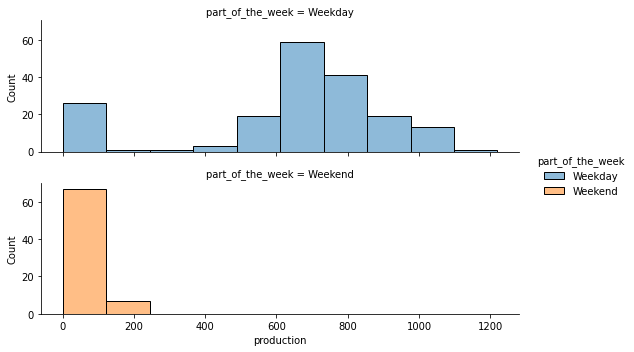

In [13]:
sns.displot(data=df_group_day, x='production', row='part_of_the_week',hue='part_of_the_week', height=2.5, aspect=3)

### Visualization - Season
We further explored if there are seasonal variations in peak power consumption and production quantity. The analysis revealed that there is not a significant difference in trends between seasonal variations.

In [14]:
list_bill= df_group_day.electricity_bill_by_season.unique()
season_mapping = {
    list_bill[0]: 'Winter',
    list_bill[1]: 'Spring',
    list_bill[2]: 'Summer'
}

# Create the 'Seasons' column based on the mapping
df_group_day['season'] = df_group_day['electricity_bill_by_season'].map(season_mapping)

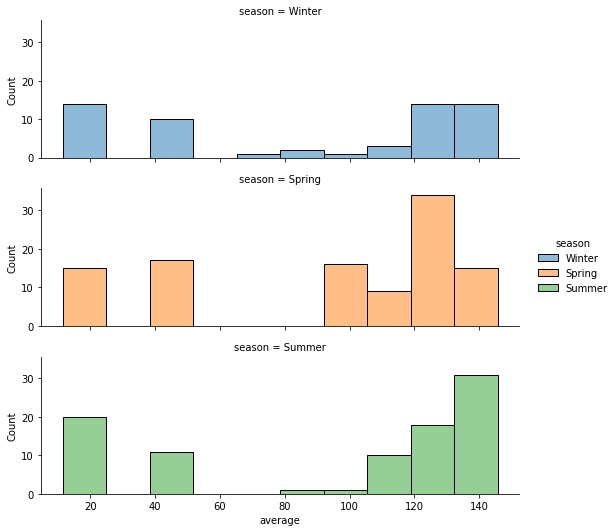

In [15]:
sns.displot(data=df_group_day, x='average', row='season',hue='season', height=2.5, aspect=3)

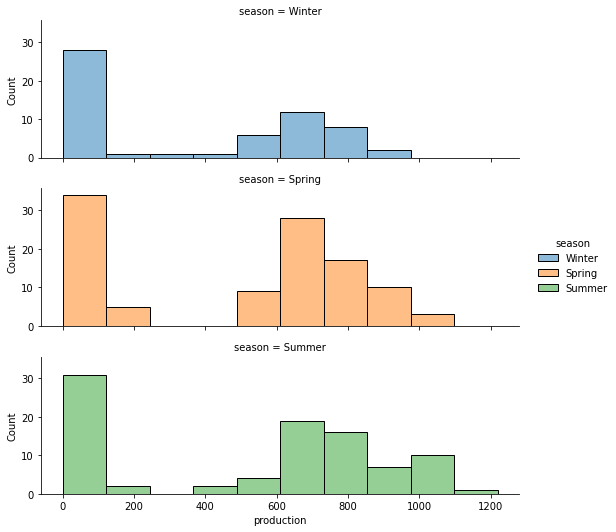

In [16]:
sns.displot(data=df_group_day, x='production', row='season',hue='season', height=2.5, aspect=3)

### Visualization - Rainfall
we binarization rain fall category

In [17]:
from sklearn.preprocessing import Binarizer

In [25]:
binarizer = Binarizer(threshold=0.0001)
col_name = 'rainfall'
trans_col_name = 'rainfall_kbin'

In [26]:
df_group_day[trans_col_name]= binarizer.fit_transform(df_group_day[[col_name]])

Text(0.5, 1.0, 'Count plot with the binarized data (threshold of 0.001)')

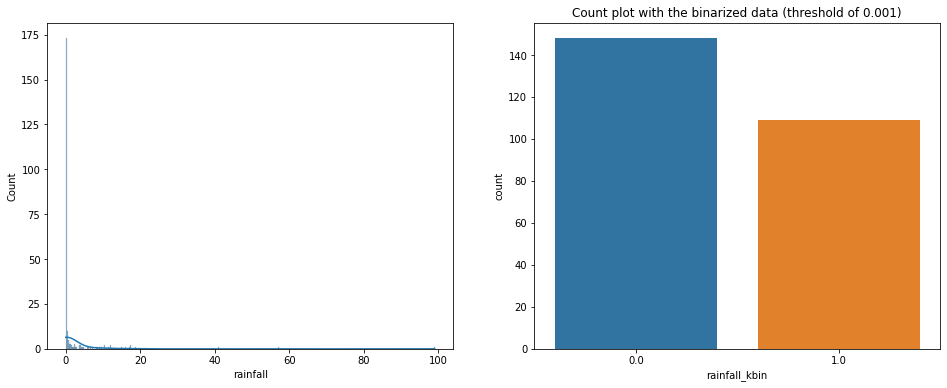

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=df_group_day, x=col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.countplot(x=df_group_day[trans_col_name])
axes[1].set_title('Count plot with the binarized data (threshold of 0.001)')

### Visualization - Temperature

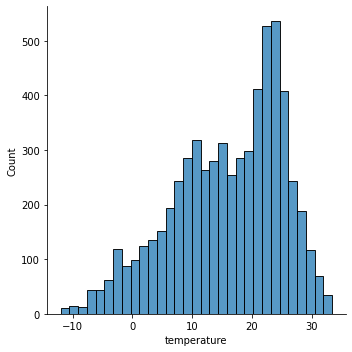

In [28]:
sns.displot(data=df, x='temperature')

**Correlation Matrix**

In [21]:
from category_encoders import BinaryEncoder
bin_encoder = BinaryEncoder()
df_group_day['part_of_the_week_category'] = bin_encoder.fit_transform(df_group_day['part_of_the_week'])['part_of_the_week_0']
df_group_day

,date,hour,15mins,30mins,45mins,60mins,average,production,temperature,wind_speed,...,day,month,num_of_workers,personnel_expenses,y,m,d,part_of_the_week,season,part_of_the_week_category
0,2021-01-01,11.5,46.500000,45.791667,46.666667,45.750000,46.250000,0.000000,-1.195833,2.058333,...,4.0,1.0,0.000000,1.3125,2021.0,1.0,1.0,Weekday,Winter,0
1,2021-01-02,11.5,46.541667,45.875000,46.791667,45.833333,46.333333,0.000000,-0.175000,2.370833,...,5.0,1.0,0.000000,1.3125,2021.0,1.0,2.0,Weekend,Winter,1
2,2021-01-03,11.5,22.916667,22.750000,22.875000,22.541667,22.875000,0.000000,-0.479167,2.920833,...,6.0,1.0,0.000000,1.3125,2021.0,1.0,3.0,Weekend,Winter,1
3,2021-01-04,11.5,117.416667,119.666667,124.291667,124.416667,121.500000,569.666667,1.000000,1.979167,...,0.0,1.0,0.991849,1.3125,2021.0,1.0,4.0,Weekday,Winter,0
4,2021-01-05,11.5,21.791667,22.125000,21.916667,21.916667,21.916667,0.000000,1.154167,1.995833,...,1.0,1.0,0.000000,1.3125,2021.0,1.0,5.0,Weekday,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2021-09-10,11.5,131.291667,133.083333,134.958333,136.916667,134.166667,782.875000,22.362500,1.312500,...,4.0,9.0,1.254724,1.3125,2021.0,9.0,10.0,Weekday,Spring,0
253,2021-09-11,11.5,42.625000,43.041667,43.541667,42.125000,42.833333,90.541667,23.729167,1.495833,...,5.0,9.0,0.403845,1.3125,2021.0,9.0,11.0,Weekend,Spring,1
254,2021-09-12,11.5,23.208333,23.041667,23.291667,23.291667,23.333333,0.000000,23.441667,1.800000,...,6.0,9.0,0.000000,1.3125,2021.0,9.0,12.0,Weekend,Spring,1
255,2021-09-13,11.5,107.083333,110.000000,112.916667,113.208333,111.000000,590.583333,22.962500,2.104167,...,0.0,9.0,0.914591,1.3125,2021.0,9.0,13.0,Weekday,Spring,0


In [20]:
df_features = df_group_day[['average','production','temperature', 'wind_speed','humidity','rainfall','num_of_workers','personnel_expenses','electricity_bill_by_season', 'part_of_the_week_category']]
df_group_day.columns

Index(['date', 'hour', '15mins', '30mins', '45mins', '60mins', 'average',
       'production', 'temperature', 'wind_speed', 'humidity', 'rainfall',
       'electricity_bill_by_season', 'day_of_the_week', 'day', 'month',
       'num_of_workers', 'personnel_expenses', 'y', 'm', 'd',
       'part_of_the_week', 'season', 'part_of_the_week_category'],
      dtype='object')

In [263]:
df_features.corr()

,average,production,temperature,wind_speed,humidity,rainfall,num_of_workers,personnel_expenses,electricity_bill_by_season,part_of_the_week_category
average,1.000000,0.815524,0.004313,0.063178,-0.001651,-0.004609,0.434063,0.082570,0.073178,-0.659153
production,0.815524,1.000000,0.107522,-0.021969,0.023909,-0.001904,0.706062,-0.112221,0.160263,-0.737597
temperature,0.004313,0.107522,1.000000,-0.506863,0.643502,0.151971,-0.042747,0.116902,0.848649,0.025620
wind_speed,0.063178,-0.021969,-0.506863,1.000000,-0.508278,0.062766,0.044825,-0.086261,-0.418696,0.047659
humidity,-0.001651,0.023909,0.643502,-0.508278,1.000000,0.294203,-0.099297,0.071763,0.629817,0.038810
rainfall,-0.004609,-0.001904,0.151971,0.062766,0.294203,1.000000,-0.020338,-0.024111,0.162508,0.036946
num_of_workers,0.434063,0.706062,-0.042747,0.044825,-0.099297,-0.020338,1.000000,-0.082972,-0.042989,-0.511315
personnel_expenses,0.082570,-0.112221,0.116902,-0.086261,0.071763,-0.024111,-0.082972,1.000000,0.082884,-0.056316
electricity_bill_by_season,0.073178,0.160263,0.848649,-0.418696,0.629817,0.162508,-0.042989,0.082884,1.000000,-0.019528
part_of_the_week_category,-0.659153,-0.737597,0.025620,0.047659,0.038810,0.036946,-0.511315,-0.056316,-0.019528,1.000000


<Axes: >

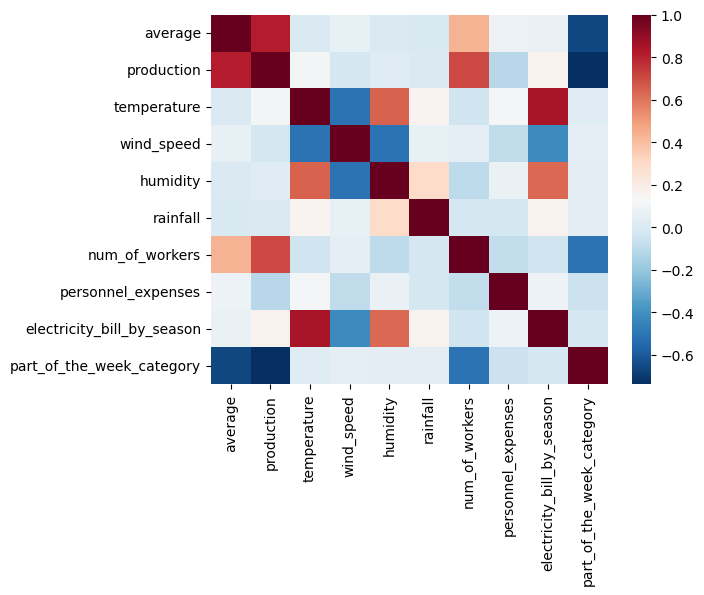

In [264]:
sns.heatmap(df_features.corr(), cmap = 'RdBu_r')

We examined the correlation between peak power consumption and other features, a high correlation was observed with production quantity. The next highest correlation coefficient was found with the number of workers at 0.43.  